# PCA - World Happiness NB Last Steps

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("World Happiness 2015-2019.csv")

In [3]:
features = df.columns[5:] 

In [4]:
df_clean = df.dropna(subset=features)

In [5]:
X_clean = df_clean[features].values

In [6]:
scaler = StandardScaler()
X_scaled_clean = scaler.fit_transform(X_clean)

The above code: Scaling adjusts each feature so that the mean is 0 and the standard deviation is 1.

The `fit_transform()` method scales the `X_clean` dataset and assigns the scaled data to the `X_scaled_clean` variable.

In [7]:
pca = PCA(n_components=6)  # selected 6 components

In [8]:
X_pca_clean = pca.fit_transform(X_scaled_clean)

In [9]:
pca_components = pca.components_

The above code: A series(array) containing the components of the PCA model (i.e., the weights of each principal component on the original features) is obtained.

In [10]:
pca_loadings = pd.DataFrame(pca_components.T, index=features, 
                            columns=['PC{}'.format(i + 1) for i in range(6)])

The above DataFrame shows the importance of each feature within each principal component.

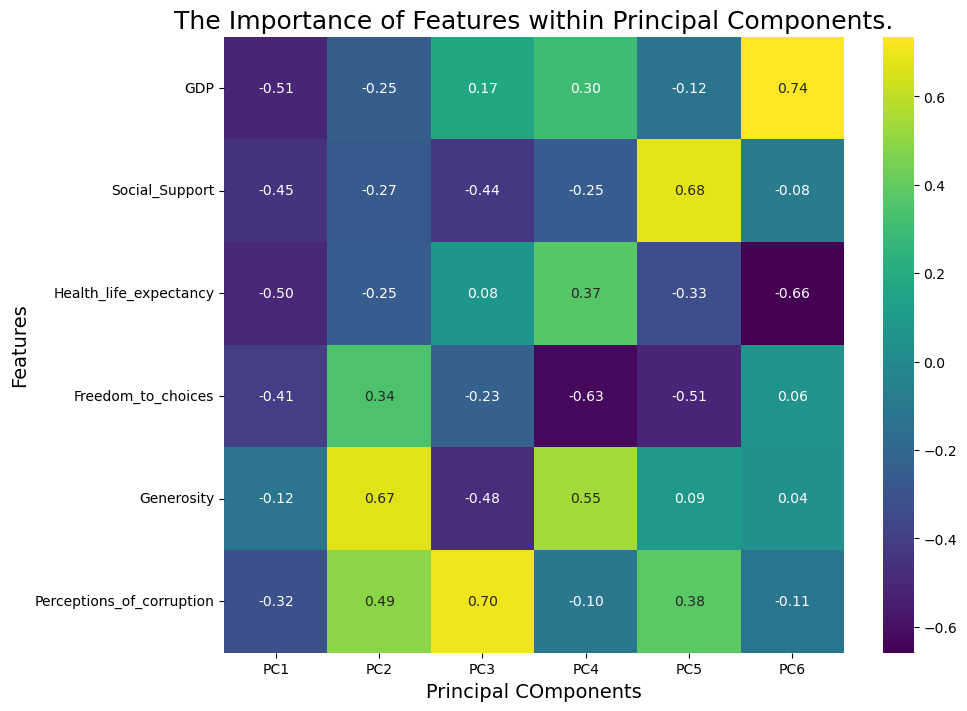

In [11]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(pca_loadings, annot=True, cmap="viridis", fmt=".2f")
plt.title('The Importance of Features within Principal Components.', fontsize=18)
plt.ylabel('Features', fontsize=14)
plt.xlabel('Principal COmponents', fontsize=14)
plt.show()

From the values in the table:

The 1st Principal Component has significantly high negative loadings on GDP per capita, healthy life expectancy, and social support, while it has a moderately negative loading on freedom to make life choices. The 2nd Principal Component has a high positive loading on generosity and a moderately positive loading on perceptions of corruption. The 3rd Principal Component has a high negative loading on perceptions of corruption and a moderately positive loading on generosity.